### 1. Generate 10 synthetic datasets where the number of datapoints should vary from 100 to 1000 by step size 100. With 100 features in each dataset. In that 100 features 40 should be informative.

#### a. Implement Linear Regression on each generated synthetic datasets and find Mean Square Error(MSE).
Note : Write down your observation on how MSE changes with increasing in dataset size.


In [100]:
import numpy as np
import sklearn.datasets as datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import pandas as pd

In [101]:
data_points_lengths = [x for x in range(100,1001,100)]

In [102]:
data_points_lengths

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

In [103]:
for data_points in data_points_lengths:
    x,y = datasets.make_regression(n_samples=data_points, n_features=100, n_informative=40) 
    
    # Model initialization
    regression_model = LinearRegression()
    # Fit the data(train the model)
    regression_model.fit(x, y)
    # Predict
    y_predicted = regression_model.predict(x)

    # model evaluation
    mse = mean_squared_error(y, y_predicted)
    r2 = r2_score(y, y_predicted)

    # printing values
    print(f"Dataset with {data_points} data points")
    print('Mean squared error: ', mse)
    print("")

Dataset with 100 data points
Mean squared error:  4.455521733656828e-25

Dataset with 200 data points
Mean squared error:  7.181581421853113e-25

Dataset with 300 data points
Mean squared error:  8.659663578715574e-25

Dataset with 400 data points
Mean squared error:  5.568180379301029e-25

Dataset with 500 data points
Mean squared error:  5.760528649365431e-25

Dataset with 600 data points
Mean squared error:  7.18252416404731e-25

Dataset with 700 data points
Mean squared error:  5.970665868075864e-25

Dataset with 800 data points
Mean squared error:  5.106911635457319e-25

Dataset with 900 data points
Mean squared error:  9.287086518856548e-25

Dataset with 1000 data points
Mean squared error:  7.340148253548543e-25



### Observation:
         For less number of data points(100),the mean squared error is less compared to others.In some cases,mean squared error increased with increase in number of datapoints.But 

### 2. Generate a synthetic dataset with 100 features and 1000 data points. In that 100 features 40 should be informative. Retrieve the Important features on generated synthetic dataset using Linear Regression Features Importance technique.

#### a. Implement Linear Regression on the retrieved important features and find the Mean Square Error(MSE).

#### b. Implement Ridge Regression on the retrieved important features and find the Mean Square Error(MSE).

#### c. Implement Lasso Regression on the retrieved important features and find the Mean Square Error(MSE).


In [104]:
# define dataset
x,y = datasets.make_regression(n_samples=1000, n_features=100, n_informative=40)
x = pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1.037457,-0.443525,0.106271,-0.482758,0.265839,0.317130,-1.768247,-0.920706,0.966119,-1.531007,...,-0.320548,1.367012,-0.795555,-0.947806,1.149068,1.234440,-0.227630,1.366145,-0.854670,-0.124365
1,0.347416,0.644452,-1.510793,0.035012,-1.954802,0.108687,2.153033,0.353528,0.178070,0.585245,...,0.738040,-0.368258,1.792738,-1.543363,0.685649,0.063517,-0.437428,-0.360336,-0.037996,-0.348957
2,0.536981,1.205548,0.279899,-0.568484,1.038975,2.025406,0.201018,0.214859,-0.368834,1.672440,...,-0.024898,-0.578313,-0.543815,-1.768620,-1.295388,-1.912383,0.866019,-0.216421,-0.511404,0.406439
3,-1.530326,-0.599941,0.171904,-0.369584,0.158248,-2.384047,-1.011385,-0.858778,1.232906,-0.115778,...,-1.080653,0.193297,2.028831,-1.021008,0.228192,0.640286,-1.050733,0.945450,0.813038,-1.378401
4,0.808723,-0.855514,0.208099,1.534268,-0.273883,1.728550,0.304369,-0.266382,-0.139389,-0.587248,...,0.263951,1.108451,0.735835,-0.556132,0.875822,0.021737,-0.548799,0.083899,-0.354407,0.630328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.966117,-0.531451,-0.197657,0.090548,-1.228518,-1.877118,-1.070386,0.302919,-0.419963,1.916052,...,-0.666901,0.924126,0.298555,-0.490056,-1.155669,-1.981226,0.407989,-0.000252,0.688677,0.348060
996,0.410075,0.445049,1.352905,1.340598,-0.114959,-1.413404,-0.668911,0.840563,0.748414,0.376247,...,-1.165829,1.754117,-0.256790,0.354718,-1.151848,0.090762,0.246572,-2.024328,-0.420456,-0.724892
997,-0.097766,-0.390900,0.947578,-1.091450,0.868239,-1.571157,-0.423502,0.544585,0.332266,1.100469,...,-1.224407,1.190104,-0.959499,-1.029171,0.503232,-0.103767,-1.030098,0.185299,-0.527911,0.285215
998,-0.290002,-2.816527,-0.300776,1.875994,0.161660,-0.749914,-1.218460,0.496001,0.404165,-1.141416,...,0.967568,-1.450607,0.383195,0.519604,1.366608,-0.765856,-1.419972,1.185495,-0.531591,-0.254360


Feature: 0, Score: 77.06575
Feature: 1, Score: 16.90896
Feature: 2, Score: 9.97598
Feature: 3, Score: 28.16567
Feature: 4, Score: 59.62499
Feature: 5, Score: 62.17143
Feature: 6, Score: 10.40414
Feature: 7, Score: 80.02321
Feature: 8, Score: 97.53820
Feature: 9, Score: 91.63643
Feature: 10, Score: 25.08120
Feature: 11, Score: 23.41390
Feature: 12, Score: 84.05700
Feature: 13, Score: 19.36466
Feature: 14, Score: 29.95986
Feature: 15, Score: 10.19245
Feature: 16, Score: 17.83962
Feature: 17, Score: 26.46006
Feature: 18, Score: 37.37172
Feature: 19, Score: 31.07222
Feature: 20, Score: 5.99115
Feature: 21, Score: 49.88202
Feature: 22, Score: 39.11423
Feature: 23, Score: 95.19192
Feature: 24, Score: 31.79342
Feature: 25, Score: 47.25502
Feature: 26, Score: 74.91016
Feature: 27, Score: 73.81113
Feature: 28, Score: 62.62154
Feature: 29, Score: 61.87862
Feature: 30, Score: 55.78815
Feature: 31, Score: 49.66495
Feature: 32, Score: 66.37706
Feature: 33, Score: 86.09665
Feature: 34, Score: 54.353

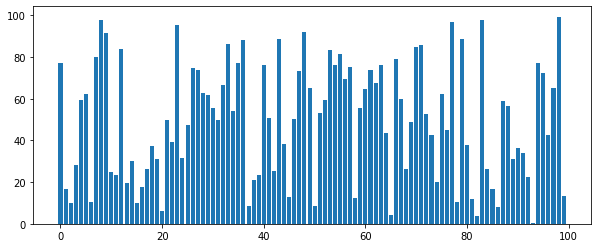

Removing features having importance < 0   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [115]:
# define the model
model = LinearRegression()
# fit the model
model.fit(x, y)
# get importance
importance = model.coef_
# summarize feature importance
features_to_remove = []
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    if v > 0:
        features_to_remove.append(i)
# plot feature importance
plt.figure(figsize=(10,4))
plt.bar([x for x in range(len(importance))], importance)
plt.show()
print("Removing features having importance < 0  ", features_to_remove)

In [106]:
# only keeping important features
x = x.drop(x.columns[features_to_remove], axis=1) 
x

,0,4,5,12,16,20,25,26,27,29,...,70,72,74,78,79,80,94,96,98,99
0,-1.037457,0.265839,0.317130,0.117456,-0.221877,0.530065,0.520092,0.267789,-0.533157,-0.600266,...,-1.949528,-0.596801,-0.230922,-1.278361,1.395075,0.433075,1.149068,-0.227630,-0.854670,-0.124365
1,0.347416,-1.954802,0.108687,-0.470874,-1.861087,0.618662,-1.039640,0.966430,-0.015325,0.720279,...,-0.323909,-1.044932,0.108029,2.388716,-0.723539,0.219113,0.685649,-0.437428,-0.037996,-0.348957
2,0.536981,1.038975,2.025406,0.871397,-0.635038,-0.071576,1.592211,0.307040,-2.281987,-1.019408,...,-0.611249,0.083040,-0.255114,-2.043266,-0.181508,1.377686,-1.295388,0.866019,-0.511404,0.406439
3,-1.530326,0.158248,-2.384047,0.545646,1.160552,-1.110194,0.216283,0.216741,-0.196372,-0.058508,...,-1.132040,-0.015277,1.118801,1.126133,-0.321185,0.244654,0.228192,-1.050733,0.813038,-1.378401
4,0.808723,-0.273883,1.728550,-0.887171,0.029859,0.698252,1.780900,0.300951,-0.528612,0.841673,...,-0.274453,-0.794462,-0.447608,-0.610615,-0.408291,-1.143259,0.875822,-0.548799,-0.354407,0.630328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.966117,-1.228518,-1.877118,-0.646230,-0.182108,1.554613,0.671073,0.357890,1.097498,0.558496,...,0.345143,0.461356,0.753854,0.235168,0.443871,-0.781740,-1.155669,0.407989,0.688677,0.348060
996,0.410075,-0.114959,-1.413404,-1.731649,0.877397,-0.216861,-0.636763,-0.469556,-1.887726,0.446614,...,-0.620513,-1.065684,-1.049153,1.057495,-0.673409,1.266848,-1.151848,0.246572,-0.420456,-0.724892
997,-0.097766,0.868239,-1.571157,0.417344,-1.279733,1.569538,0.616420,0.121133,-1.500184,1.284546,...,1.865238,0.579284,0.941679,-0.038772,-0.512465,2.231031,0.503232,-1.030098,-0.527911,0.285215
998,-0.290002,0.161660,-0.749914,1.044849,0.131733,0.035849,0.211246,0.725201,-0.184969,-0.626719,...,0.094066,0.505310,-0.485759,-2.409622,-1.049730,-0.537706,1.366608,-1.419972,-0.531591,-0.254360


In [107]:
# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)
# model evaluation
mse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print("Linear Regression")
print("Coefficients : ",regression_model.coef_[0],regression_model.intercept_)
print('Mean squared error: ', mse)

Linear Regression
Coefficients :  -0.6367051473918222 13.120402044454014
Mean squared error:  128914.80686032589


In [108]:
# define model
model = Ridge(alpha=1.0)
# fit model
model.fit(x, y)

y_predicted = model.predict(x)

# model evaluation
mse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print("Ridge Regression")
print('Slope:' ,model.coef_)
print('Intercept:', model.intercept_)
print(' Mean squared error: ', mse)

Slope: [ -0.6367862    2.03098281  -4.07815253  15.47256985   6.11299406
  -4.56605918   9.21197202   6.59510419   4.39383498   7.79952723
   1.8481052  -15.54043535  -7.56741863  -3.01753209 -11.67461363
  -8.18702215   2.2483448   -0.19258541  26.26859212 -12.55652584
   0.98914188   7.27264389  30.56084528  -7.77558521  10.90112654
  16.72014107 -10.25112252  -1.72794239   5.43748728  -2.64272736
  12.4506675  -10.1192281  -15.22693475 -11.47331036]
Intercept: 13.119225895126618
 Mean squared error:  128914.81129061665


In [110]:
# define model
model = Lasso(alpha=1.0)
# fit model
model.fit(x, y)
# make a prediction
yhat = model.predict(x)
# model evaluation
mse = mean_squared_error(y, y_predicted)

# printing values
print("Lasso Regression")
print('Slope:' ,model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error: ', mse)

Lasso Regression
Slope: [ -0.           1.0554985   -3.31590948  14.25370638   5.47139657
  -3.46558864   8.02803557   5.78167598   3.44711967   6.74178157
   0.84360277 -14.45507104  -6.61429413  -1.95167552 -10.65642985
  -6.81951703   1.28082668  -0.          25.21814809 -11.23446494
   0.           6.25903156  29.31310498  -6.71016332  10.01766185
  15.57109719  -9.23994507  -0.89303466   4.81519037  -1.5623813
  11.55853264  -9.16484454 -14.35870163 -10.31689509]
Intercept: 12.983973925018406
Mean squared error:  128914.81129061665


### 3. Generate 10 synthetic datasets with 1000 data points and 100 features where the number of informative features should vary from 10 to 100 by step size 10.
#### a. Implement Linear Regression on each generated synthetic datasets and find Mean Square Error(MSE).
#### Note : Write down your observation on how MSE changes with each dataset.

In [112]:
informative_features_list = [x for x in range(10,101,10)]
informative_features_list

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [114]:
for informative_features in informative_features_list:
    x,y = datasets.make_regression(n_samples=1000, n_features=100, n_informative=informative_features) 
    
    # Model initialization
    regression_model = LinearRegression()
    # Fit the data(train the model)
    regression_model.fit(x, y)
    # Predict
    y_predicted = regression_model.predict(x)

    # model evaluation
    mse = mean_squared_error(y, y_predicted)
    r2 = r2_score(y, y_predicted)

    # printing values
    print(f"Dataset with {informative_features} Informative Features")
    print('Mean squared error: ', mse)
    print("")

Dataset with 10 Informative Features
Mean squared error:  1.9217335376651925e-25

Dataset with 20 Informative Features
Mean squared error:  3.188741439693426e-25

Dataset with 30 Informative Features
Mean squared error:  4.43745421568628e-25

Dataset with 40 Informative Features
Mean squared error:  8.895066446519162e-25

Dataset with 50 Informative Features
Mean squared error:  1.5406273303135607e-24

Dataset with 60 Informative Features
Mean squared error:  1.3937219742821182e-24

Dataset with 70 Informative Features
Mean squared error:  1.2766404494334898e-24

Dataset with 80 Informative Features
Mean squared error:  1.744188791140023e-24

Dataset with 90 Informative Features
Mean squared error:  1.3549365285037295e-24

Dataset with 100 Informative Features
Mean squared error:  1.7677621637985616e-24



### Observation:
    For less number of informative features mean squared error is more.from 10 to 40 informative features,
    mean squared error is increased.after 50 to 100,mean squared error is less and all are nearly same.